# Linear Regression

## Data

Since this is linear regression, we will have datapoints with the following format:

$$(x_i, y_i) \in \mathbb{R} \times \mathbb{R}$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
N = 64 # Sample size
a = 2.1
b = 0.8

In [15]:
x_rand = np.random.rand(N)*20
y_rand = np.random.rand(N)*20

x = np.arange(-1*N/2, N/2)
y = a*x + b

x += x_rand
y += y_rand

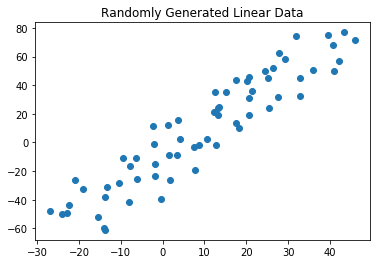

In [18]:
plt.scatter(x, y)
plt.title("Randomly Generated Linear Data")
plt.show()

## Model

In linear regression, we would want to create a prediction function in the form of linear function:

$$\hat{y} = f(x) = ax + b$$

## Loss Function

We will use squared loss

$$L_2(\hat{y}, y) = (\hat{y} - y)^2$$

## Optimization

We will minimize the loss function with the following procedure:

$$L = \sum_{i=1}^n(\hat{y}_i - y_i)^2$$
$$  = \sum_{i=1}^n(ax_i + b - y_i)^2$$

$$\frac{dL}{da} = 0 = 2a \sum_{i=1}^n x_i^2 + 2b \sum_{i=1}^n x_i - 2 \sum_{i=1}^n x_iy_i$$

$$\frac{dL}{db} = 0 = 2a \sum_{i=1}^n x_i + 2bn  - 2 \sum_{i=1}^n y_i$$

Note $x_i$ and $y_i$ are provided values.  We can solve for $a$ and $b$.

In [22]:
c11 = np.sum(x**2)
c21 = np.sum(x)

c12 = np.sum(x)
c22 = N

y1 = np.sum(x*y)
y2 = np.sum(y)

# Solving simple matrix
a, b = np.linalg.solve(np.matrix([[c11, c21], [c12, c22]]), np.array([y1, y2]))

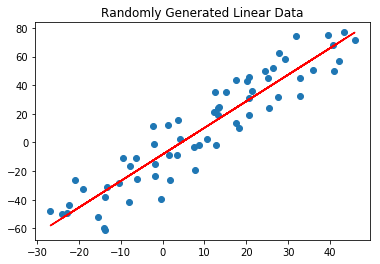

In [25]:
ax = plt.axes()
plt.scatter(x, y)
plt.title("Randomly Generated Linear Data")
ax.plot(x, a*x + b, color="red")
plt.show()


## Multivariate Linear Regression

### Data
Let $$(x_i, y_i) \in \mathbb{R}^m \times \mathbb{R}^k$$

### Model

The **model** to predict is 
$$y = Ax$$

for $A \in \mathbb{R}^{k \times m}$

### Loss Function/Risk Function

**Empirical Risk (average loss)** is

$$L = \sum_{i=1}^n(Ax_i - y_i)^2 = \sum_{i=1}^n(x_i^TA^T - y_i^T)(Ax_i - y_i)$$

### Optimization

To calculate the derivative (gradient), *check out critical point*

$$\nabla_AL = 2A\sum_{i=1}^n x_ix_i^T - 2 \sum_{i=1}^n y_ix_i^T = 0$$

So, we will solve
$$A = M_{yx}M_{xx}^{-1}$$

where $M_{xx} = \sum_{i=1}^nx_ix_i^T$ and $M_{yx} = \sum_{i=1}^ny_ix_i^T$

#### Aside:  Moments

We can set $M_{xx} = \frac{1}{n}\sum_{i=1}^nx_ix_i^T$ and $M_{yx} =  \frac{1}{n} \sum_{i=1}^ny_ix_i^T$

These are called **sample moments**, and they converge to true moments

$$M_{xx} \rightarrow \mu_{xx} = \mathbb{E}[xx^T]$$
$$M_{yx} \rightarrow \mu_{yx} = \mathbb{E}[yx^T]$$

So, in this case:  **empirical risk-minimizing model** $A = M_{yx}M_{xx}^{-1}$ converges to the **true risk minimizing model** $A_0 = \mu_{yx}\mu_{xx}^{-1}$